# Investigating Fandango Movie Ratings

### Introduction

In this project we will work with movie rating data from Fandango. The objective is a follow up to [this article](https://fivethirtyeight.com/features/fandango-movies-ratings/), that found a problem in the way Fandango transformed their rating into stars. 

For this purpose, we will use two set of datas. The data that originated the article, found on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango) and movies ratings for movies released in 2016 and 2017 collected by Dataquest and avaliable on their [Github](https://github.com/mircealex/Movie_ratings_2016_17).

The learning objectives of this project are: designing, collecting and comparing two samples to answer a question. 

### Reading the data

In [1]:
import pandas as pd
import numpy as np

old_ratings = pd.read_csv("fandango_score_comparison.csv")
new_ratings = pd.read_csv("movie_ratings_16_17.csv")

In [2]:
print(old_ratings.shape)
old_ratings.head()

(146, 22)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
print(new_ratings.shape)
new_ratings.head()

(214, 15)


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


After understanding the tables, we will save on each Dataframe only the columns needed for our analysis (columns involving movie informations and Fandango ratings)

In [4]:
old_ratings = old_ratings[["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]]
new_ratings = new_ratings[["movie", "year", "fandango"]]

In [5]:
old_ratings.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
new_ratings.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.

Because we want to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.

The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository):

- The movie must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

### Changing the objective

As we find that the samples are not randomly selected and they are not good samples of the population, we will shift the focus of our analysis to compared the ratings of populars movies released on 2015 (old_ratings) and 2016 (new_ratings).

The criteria used to classify popular movies will be the same as the article analysis: The movie must have had at least 30 fan ratings on Fandango's website.

The next step is to make sure that both datasets contains only movies with more than 30 fan ratings and separated the data into two datasets: one containing the movies launched on 2015 and other on 2016.

### Isolating the samples

In [7]:
old_ratings['Fandango_votes'].value_counts().sort_index(ascending=True).head(5)

35    1
36    1
38    2
41    2
42    1
Name: Fandango_votes, dtype: int64

In [8]:
new_ratings.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


The new_ratings dataset doesn't contain the number of votes on Fandango site. To check this, we will sample ten movies randomly and check manually on Fandango's website their number of votes. We expect at least 8 of 10 of them to have more than 30 votes.

In [9]:
new_ratings.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


The results are as follow:

- Mechanic: Ressurection - 2,248
- Warcraft - 7,277
- Max Steel - 493
- Me Before You - 5,267
- Fantastic Beasts and Where to Find Them - 13,422
- Cell - 18
- Genius - 127
- Sully - 11,882
- A Hologram for the King - 500
- Captain America: Civil War - 35,133

90% of our sample had more than 30 ratings, so we will proceed with the analysis. The next step is to isolate two Dataframes: one containing only movies launched in 2015 and other in 2016.

The old_ratings doesn't containg a field with the year the movie was launched, but the year are in the end of the FILM column, so we will isolate that. 

In [10]:
def isolate_year(string):
    year = string[- 5 : - 1]
    return year

old_ratings['Year'] = old_ratings['FILM'].apply(isolate_year)
old_ratings.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [11]:
old_ratings['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [12]:
fandango_2015 = old_ratings[old_ratings['Year'] == '2015']
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [13]:
new_ratings['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [14]:
fandango_2016 = new_ratings[new_ratings['year'] == 2016]
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

### Comparing distributions shape

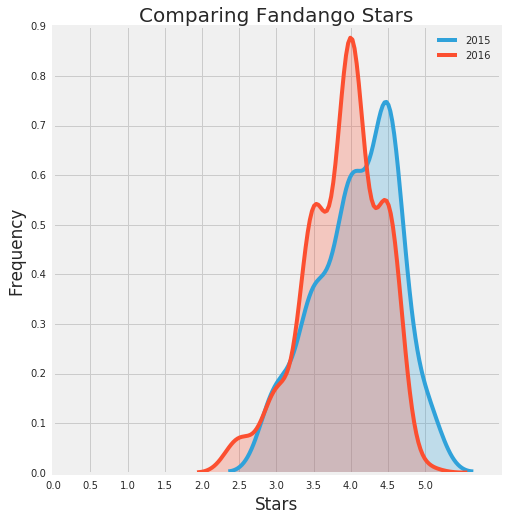

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

fig = plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
sns.kdeplot(fandango_2015['Fandango_Stars'], shade=True, label='2015')
sns.kdeplot(fandango_2016['fandango'], shade=True, label='2016')
plt.xlabel("Stars")
plt.ylabel("Frequency")
plt.title("Comparing Fandango Stars", size=20)
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])

plt.show()

Comparing both years, it appears there is a difference in the shape of each distribution. The 2016 distribution looks like a gaussian but 2015 looks like a left skewed distribution (which could be caused by the rounding up of the ratings to stars). 

Comparing both distributions, it appears that in 2015 there were more movies with highers stars.

### Comparing Relative Frequencies

In [40]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [39]:
fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

### Comparing summary statistics

In [43]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


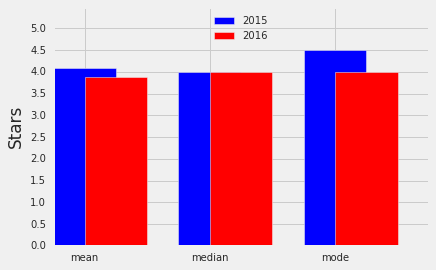

In [77]:
summary['2015'].plot.bar(align="center", color='b', rot=0)
summary['2016'].plot.bar(align="edge", color='r', rot=0)
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.ylim(0,5.5)
plt.ylabel('Stars')


plt.legend(loc='upper center')

Comparing both statistics, we can see that both years have the same median, but 2015 have a bigger mean and a bigger mode. This shows that the ratings for 2015 movies are bigger than the 2016.

This change in mean could be caused by movies in 2015 being of higher quality. But not only the mean changed between 2015 and 2016; there were also changes in the distribution. This indicates that Fandango really corrected their rating system for 2016. Another analysis that could confirm this pattern is to analyse other movies site (like Rotting Tomatoes or IMBD) and compare the movies ratings for 2015 and 2016.